In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import r2_score

import warnings
# Suppress specific warnings
warnings.filterwarnings("ignore")

In [65]:
df = pd.read_csv(r"C:\Users\71589\Desktop\Microsoft_Stock.csv")


In [66]:
df

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


In [67]:
df = df.drop(columns=["Open", "High", "Low", "Volume"])


In [68]:
df

,Date,Close
0,4/1/2015 16:00:00,40.72
1,4/2/2015 16:00:00,40.29
2,4/6/2015 16:00:00,41.55
3,4/7/2015 16:00:00,41.53
4,4/8/2015 16:00:00,41.42
...,...,...
1506,3/25/2021 16:00:00,232.34
1507,3/26/2021 16:00:00,236.48
1508,3/29/2021 16:00:00,235.24
1509,3/30/2021 16:00:00,231.85


In [69]:
print(df.columns)


Index(['Date', 'Close'], dtype='object')


In [70]:
# Make sure your "month" column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [71]:
# Sorting the data by date (if not sorted)
df = df.sort_values(by='Date')

In [72]:
# Resetting the index
df.set_index('Date', inplace=True)
 
df.dropna(inplace=True)

In [73]:
df

,Close
Date,
2015-04-01 16:00:00,40.72
2015-04-02 16:00:00,40.29
2015-04-06 16:00:00,41.55
2015-04-07 16:00:00,41.53
2015-04-08 16:00:00,41.42
...,...
2021-03-25 16:00:00,232.34
2021-03-26 16:00:00,236.48
2021-03-29 16:00:00,235.24


In [75]:
# Decompose the time series seasonal decompose 
decomposition = seasonal_decompose(df['Close'], model='additive', period=12)  # period=12 for monthly data

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


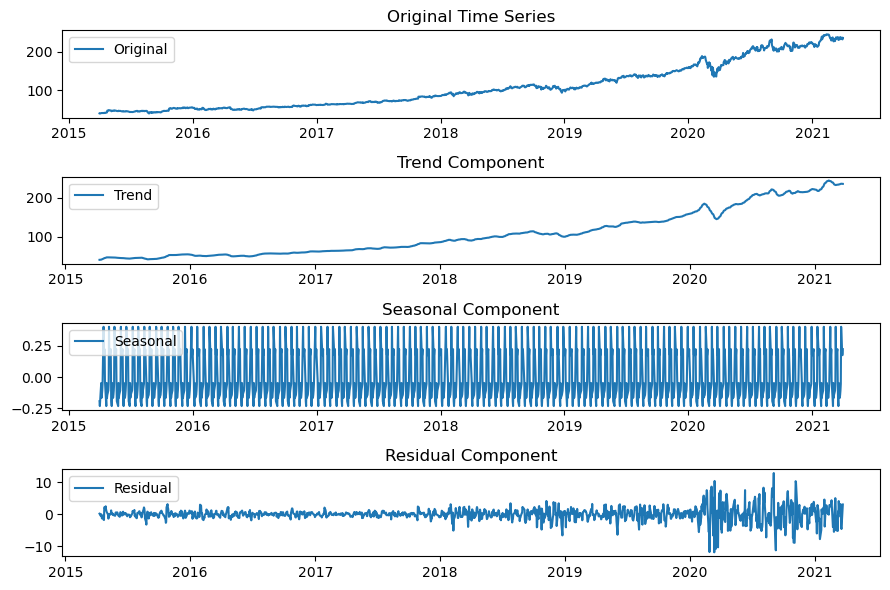

In [76]:
plt.figure(figsize=(9, 6))

plt.subplot(4, 1, 1)
plt.plot(df['Close'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


In [90]:
def plot_series(series):
    plt.figure(figsize=(12,6))
    plt.plot(series, color='red')
    plt.ylabel('Close', fontsize=16)

    for year in range(1949, 1963):
        plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

NameError: name 'datetime' is not defined

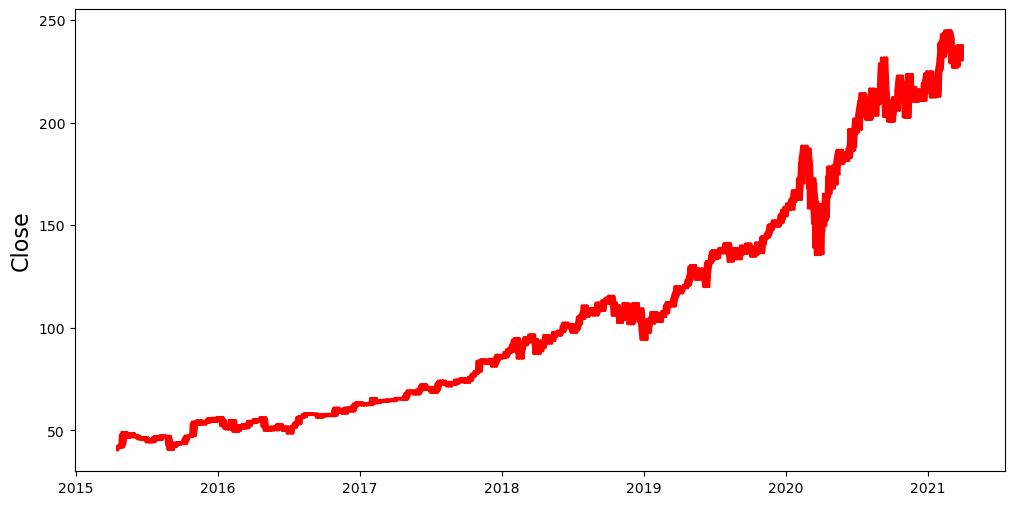

In [91]:
plot_series(df)


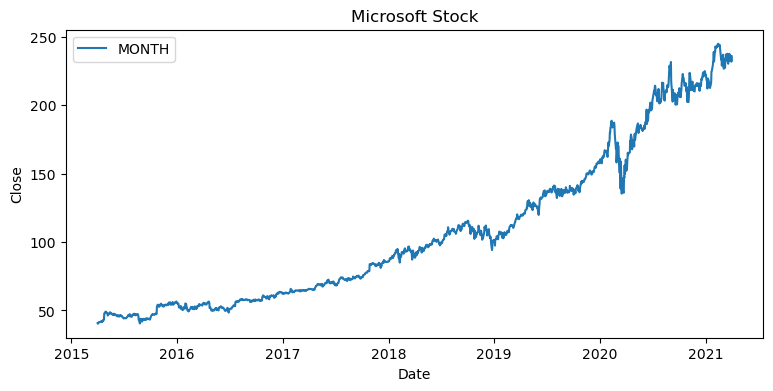

In [78]:
# Plot the '#Passengers' data over time with appropriate labels, legend, and title to visualize the monthly passenger trend
plt.figure(figsize=(9, 4))
plt.plot(df.index, df['Close'], label='MONTH')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.title('Microsoft Stock')
plt.show()


In [101]:
#normizlizing 

avg, dev = df.mean(), df.std()

In [103]:
Close = (df - avg) / dev


NameError: name 'datetime' is not defined

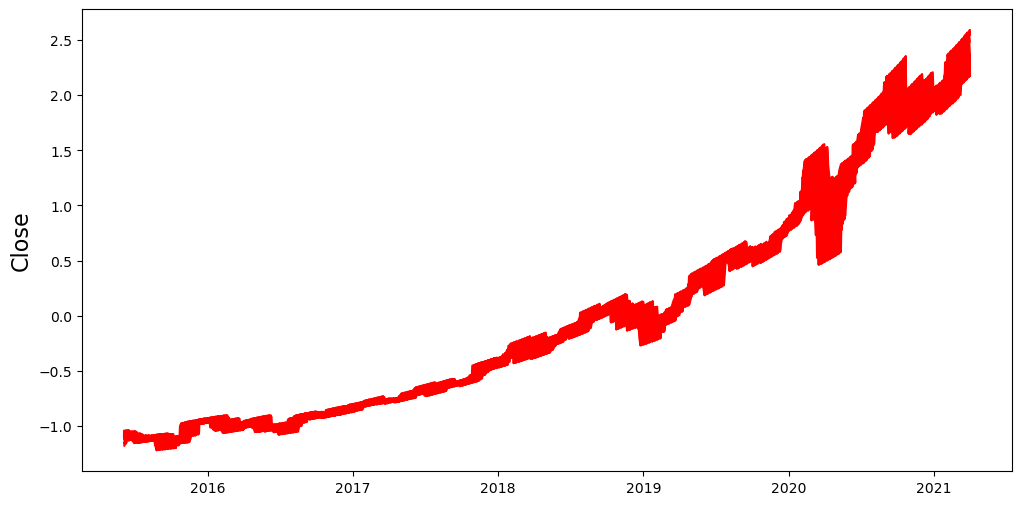

In [104]:
plot_series(Close)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

In [107]:
Close = Close.diff().dropna()


In [109]:
## Take First Difference to Remove Trend
Close = Close.diff().dropna()


NameError: name 'datetime' is not defined

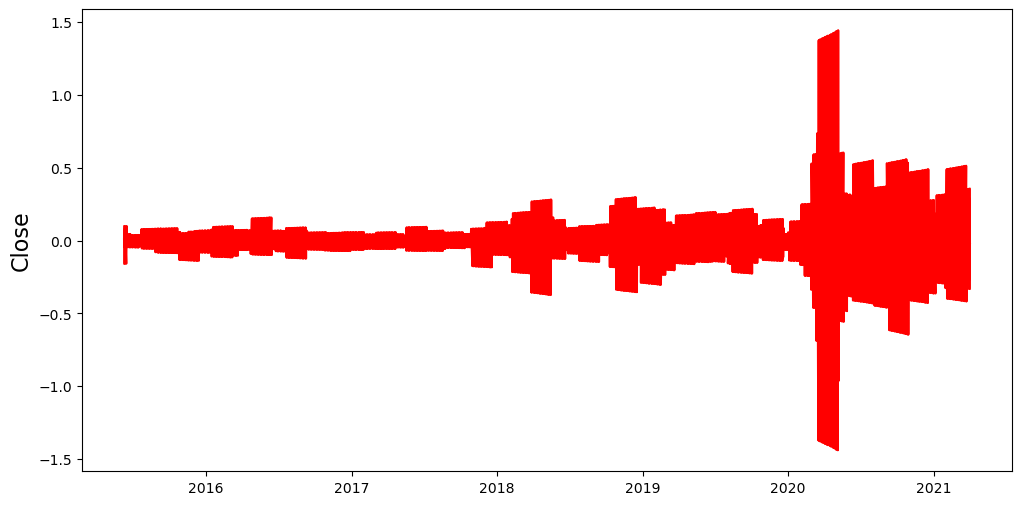

In [111]:
plot_series(Close)
plt.axhline(0, linestyle='--', color='k')


In [112]:
## Remove Increasing Volatility


In [114]:
annual_volatility = Close.groupby(Close.index.year).std()


In [115]:
annual_volatility

,Close,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,...,Lag_25,Lag_26,Lag_27,Lag_28,Lag_29,Lag_30,Lag_31,Lag_32,Lag_33,Lag_34
Date,,,,,,,,,,,,,,,,,,,,,
2015,0.032568,0.032617,0.032618,0.032676,0.032697,0.032756,0.032890,0.032796,0.032461,0.032715,...,0.031176,0.031248,0.031311,0.031356,0.031362,0.032053,0.034399,0.034985,0.035059,0.035231
2016,0.035202,0.035235,0.035297,0.035334,0.035394,0.035441,0.035489,0.035606,0.035702,0.035690,...,0.037052,0.037101,0.037139,0.037134,0.037268,0.037544,0.037742,0.037705,0.037611,0.037548
2017,0.031622,0.031678,0.031711,0.031756,0.031807,0.031847,0.031890,0.031976,0.032069,0.031574,...,0.030336,0.030213,0.030282,0.030340,0.030323,0.030239,0.030317,0.030555,0.030814,0.031043
2018,0.083638,0.083660,0.083618,0.081689,0.080800,0.080899,0.081003,0.081116,0.081030,0.081242,...,0.078475,0.078557,0.078419,0.078474,0.078387,0.078232,0.078184,0.078229,0.078354,0.078451
2019,0.071809,0.071915,0.072165,0.074499,0.075667,0.075739,0.075810,0.075905,0.076258,0.076434,...,0.083539,0.083766,0.084111,0.084329,0.084710,0.085121,0.085455,0.085682,0.085837,0.085998
2020,0.253704,0.253997,0.254299,0.254612,0.254917,0.255043,0.255389,0.255615,0.255883,0.256168,...,0.260671,0.261055,0.261382,0.261613,0.261997,0.262457,0.262903,0.263358,0.263647,0.263143
2021,0.174705,0.173948,0.174026,0.172001,0.171456,0.172785,0.173054,0.172603,0.173344,0.171738,...,0.150593,0.150780,0.150033,0.151440,0.152205,0.152484,0.152709,0.153091,0.154535,0.161315


In [121]:
def get_annual_volatility(d):
    try:
        return float(annual_volatility.loc[d.year])
    except KeyError:
        return np.nan  # or any other default value you prefer



In [123]:
# Adding lag features to the DataFrame
for i in range(1,35): # Creating lag features up to 5 days
	df[f'Lag_{i}'] = df['Close'].shift(i)

# Drop rows with NaN values resulting from creating lag features
df.dropna(inplace=True)

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

# Define the input features (lag features) and target variable

y_train = train_data['Close']

y_test = test_data['Close']


In [93]:
df

,Close,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,...,Lag_25,Lag_26,Lag_27,Lag_28,Lag_29,Lag_30,Lag_31,Lag_32,Lag_33,Lag_34
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-05 16:00:00,46.14,46.36,46.85,46.92,47.23,46.86,47.45,47.61,46.59,46.90,...,48.64,49.06,49.16,48.03,47.87,43.34,42.99,42.64,42.91,41.62
2015-06-08 16:00:00,45.73,46.14,46.36,46.85,46.92,47.23,46.86,47.45,47.61,46.59,...,48.66,48.64,49.06,49.16,48.03,47.87,43.34,42.99,42.64,42.91
2015-06-09 16:00:00,45.65,45.73,46.14,46.36,46.85,46.92,47.23,46.86,47.45,47.61,...,48.24,48.66,48.64,49.06,49.16,48.03,47.87,43.34,42.99,42.64
2015-06-10 16:00:00,46.61,45.65,45.73,46.14,46.36,46.85,46.92,47.23,46.86,47.45,...,47.60,48.24,48.66,48.64,49.06,49.16,48.03,47.87,43.34,42.99
2015-06-11 16:00:00,46.44,46.61,45.65,45.73,46.14,46.36,46.85,46.92,47.23,46.86,...,46.28,47.60,48.24,48.66,48.64,49.06,49.16,48.03,47.87,43.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25 16:00:00,232.34,235.46,237.58,235.99,230.35,230.72,237.04,237.71,234.81,235.75,...,243.79,244.20,243.70,244.99,244.49,242.82,243.77,242.47,242.20,242.01
2021-03-26 16:00:00,236.48,232.34,235.46,237.58,235.99,230.35,230.72,237.04,237.71,234.81,...,240.97,243.79,244.20,243.70,244.99,244.49,242.82,243.77,242.47,242.20
2021-03-29 16:00:00,235.24,236.48,232.34,235.46,237.58,235.99,230.35,230.72,237.04,237.71,...,234.51,240.97,243.79,244.20,243.70,244.99,244.49,242.82,243.77,242.47


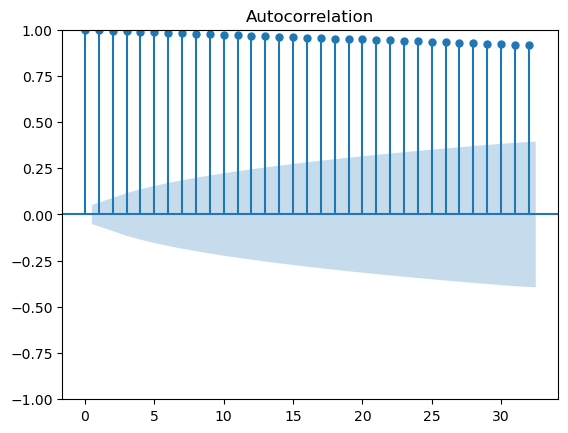

In [124]:
from statsmodels.graphics.tsaplots import plot_acf
series = df['Close'] # Extract the '#Passengers' series from the DataFrame
plot_acf(series) # Plot the autocorrelation function (ACF) to visualize how the series correlates with its lagged versions
plt.show()


In [100]:
for lag in range(1, 135):
    autocorrelation = df['Close'].corr(df['Close'].shift(lag))
    print(f"Lag {lag}: Autocorrelation = {autocorrelation:.4f}")

Lag 1: Autocorrelation = 0.9991
Lag 2: Autocorrelation = 0.9987
Lag 3: Autocorrelation = 0.9982
Lag 4: Autocorrelation = 0.9976
Lag 5: Autocorrelation = 0.9971
Lag 6: Autocorrelation = 0.9965
Lag 7: Autocorrelation = 0.9962
Lag 8: Autocorrelation = 0.9957
Lag 9: Autocorrelation = 0.9953
Lag 10: Autocorrelation = 0.9947
Lag 11: Autocorrelation = 0.9943
Lag 12: Autocorrelation = 0.9938
Lag 13: Autocorrelation = 0.9933
Lag 14: Autocorrelation = 0.9930
Lag 15: Autocorrelation = 0.9926
Lag 16: Autocorrelation = 0.9924
Lag 17: Autocorrelation = 0.9920
Lag 18: Autocorrelation = 0.9917
Lag 19: Autocorrelation = 0.9913
Lag 20: Autocorrelation = 0.9909
Lag 21: Autocorrelation = 0.9906
Lag 22: Autocorrelation = 0.9902
Lag 23: Autocorrelation = 0.9899
Lag 24: Autocorrelation = 0.9896
Lag 25: Autocorrelation = 0.9895
Lag 26: Autocorrelation = 0.9894
Lag 27: Autocorrelation = 0.9894
Lag 28: Autocorrelation = 0.9893
Lag 29: Autocorrelation = 0.9893
Lag 30: Autocorrelation = 0.9892
Lag 31: Autocorrela

In [98]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create and train the autoregressive model
lag_order = 135 # Adjust this based on the ACF plot
ar_model = AutoReg(y_train, lags=lag_order)
ar_results = ar_model.fit()


In [99]:
# Make predictions on the test set
y_pred = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)
#print(y_pred)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f' r2 score: {r2:.2f}')


Mean Absolute Error: 12.45
Root Mean Squared Error: 15.17
 r2 score: 0.63


In [88]:
test_data.columns = test_data.columns.str.strip()  # Remove any leading/trailing spaces
print(test_data.columns)

Index(['Close', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6', 'Lag_7',
       'Lag_8', 'Lag_9', 'Lag_10', 'Lag_11'],
      dtype='object')


In [89]:
test_data.reset_index(drop=True, inplace=True)

In [129]:
date_range = pd.date_range(start='2015-01-01', periods=12, freq='M')
actual_close = np.random.randint(100, 200, size=12)  # Example actual data
predicted_close = actual_close + np.random.normal(0, 10, size=12)  # Example predicted data

In [130]:
test_data = pd.DataFrame({'Actual': actual_close, 'Predicted': predicted_close}, index=date_range)


In [131]:
test_data = pd.DataFrame({'Actual': actual_close, 'Predicted': predicted_close}, index=date_range)


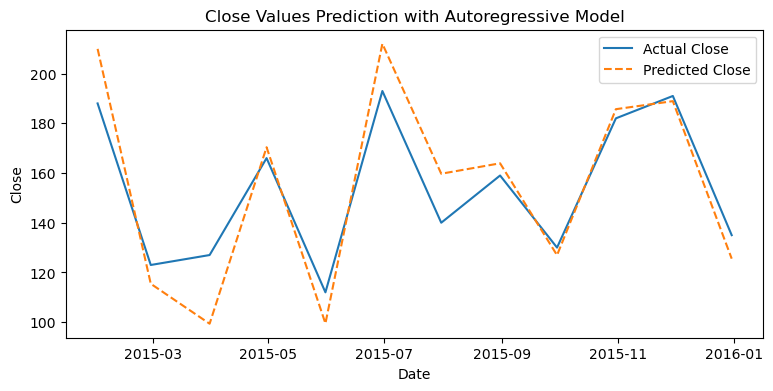

In [132]:
# Create a DataFrame for test data
test_data = pd.DataFrame({'Actual': actual_close, 'Predicted': predicted_close}, index=date_range)

# Define y_test and y_pred from the test_data DataFrame
y_test = test_data['Actual']
y_pred = test_data['Predicted']

# Plotting the actual vs. predicted close values
plt.figure(figsize=(9, 4))
plt.plot(test_data.index, y_test, label='Actual Close')
plt.plot(test_data.index, y_pred, label='Predicted Close', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.title('Close Values Prediction with Autoregressive Model')
plt.show()

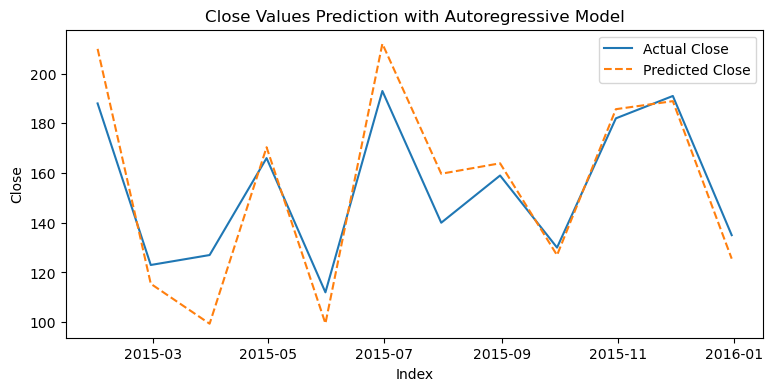

In [133]:
plt.figure(figsize=(9, 4))
plt.plot(test_data.index, y_test, label='Actual Close')
plt.plot(test_data.index, y_pred, label='Predicted Close', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Close')
plt.legend()
plt.title('Close Values Prediction with Autoregressive Model')
plt.show()

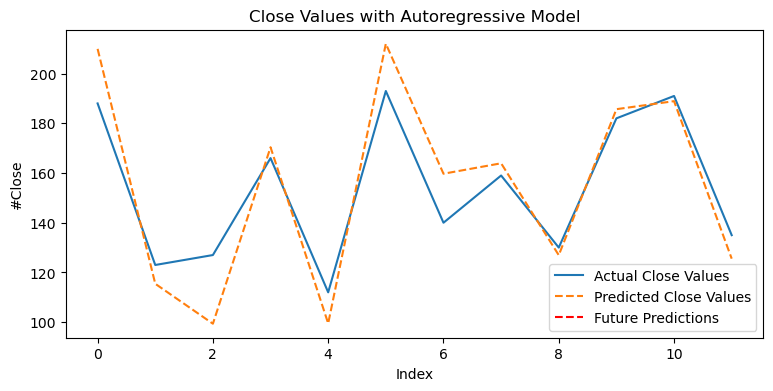

In [134]:
# Define the number of future time steps you want to predict
forecast_steps = 7
# Generate future indices
future_indices = range(len(y_test), len(y_test) + forecast_steps)
# Generate future predictions
future_predictions = ar_results.predict(start=len(train_data), end=len(train_data) + forecast_steps - 1, dynamic=False)
# Plot the actual data, existing predictions, and future predictions
plt.figure(figsize=(9, 4))
plt.plot(range(len(y_test)), y_test, label='Actual Close Values')
plt.plot(range(len(y_test)), y_pred, label='Predicted Close Values', linestyle='--')
plt.plot(future_indices, future_predictions[-forecast_steps:], label='Future Predictions', linestyle='--', color='red')
plt.xlabel('Index')
plt.ylabel('#Close')
plt.legend()
plt.title('Close Values with Autoregressive Model')
plt.show()

In [135]:
# Extract 'Close' column and convert to DataFrame
df = df['Close'].to_frame()

# Calculate 12-day Simple Moving Average (SMA)
df['SMA12'] = df['Close'].rolling(12).mean()

# Remove NULL values
df.dropna(inplace=True)

# Print DataFrame
df


,Close,SMA12
Date,,
2015-08-10 16:00:00,47.33,46.593333
2015-08-11 16:00:00,46.41,46.632500
2015-08-12 16:00:00,46.74,46.748333
2015-08-13 16:00:00,46.73,46.864167
2015-08-14 16:00:00,47.00,46.923333
...,...,...
2021-03-25 16:00:00,232.34,234.775000
2021-03-26 16:00:00,236.48,235.113333
2021-03-29 16:00:00,235.24,234.955833


<Axes: xlabel='Date'>

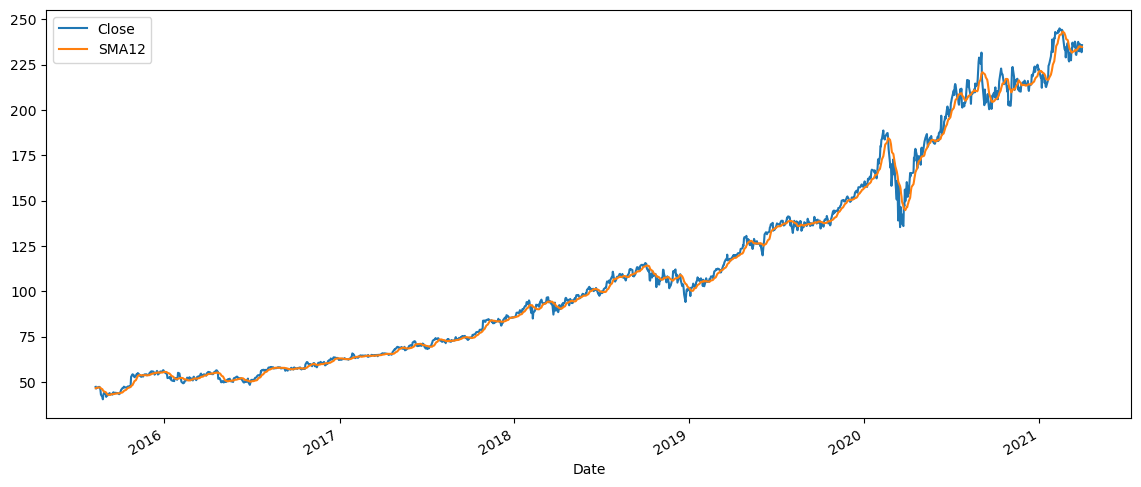

In [136]:
# plotting Close price and simple 
# moving average of 12 days using .plot() method - (trends plot) 
df[['Close', 'SMA12']].plot(label='RELIANCE', 
								figsize=(14, 6))


In [137]:
# Extract and isolate 'Close' column, converting to DataFrame
df = df['Close'].to_frame()

# Calculate Cumulative Moving Average (CMA) with a window of 12
df['CMA12'] = df['Close'].expanding().mean()

# Print DataFrame
df


,Close,CMA12
Date,,
2015-08-10 16:00:00,47.33,47.330000
2015-08-11 16:00:00,46.41,46.870000
2015-08-12 16:00:00,46.74,46.826667
2015-08-13 16:00:00,46.73,46.802500
2015-08-14 16:00:00,47.00,46.842000
...,...,...
2021-03-25 16:00:00,232.34,110.982414
2021-03-26 16:00:00,236.48,111.070917
2021-03-29 16:00:00,235.24,111.158421


In [138]:
#diff1 -finding the dif is to make sure if the data is stationary 


<Axes: xlabel='Date'>

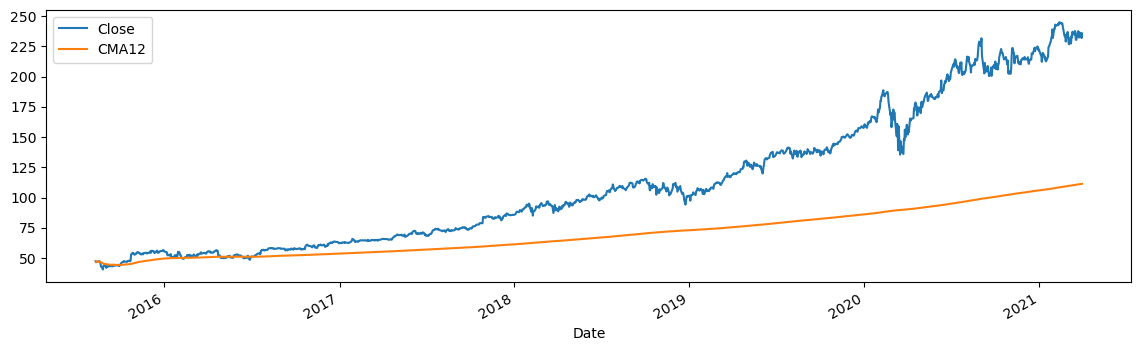

In [139]:
# Plotting the '#Passengers' column and the cumulative moving average (CMA) of 12 days
# using the .plot() method. This helps visualize the trend of passenger numbers over time 
# and how the cumulative moving average smooths out short-term fluctuations to highlight longer-term trends.
df[['Close', 'CMA12']].plot(label='RELIANCE', 
                                  figsize=(14, 4))

Exponential Moving Average


In [141]:
# Extract and isolate the '#Passengers' column from the DataFrame and convert it into a new DataFrame.
# This step prepares the data for further analysis.
df = df['Close'].to_frame()

# Calculate Exponential Moving Average (EWMA) with a span of 12
df['EWMA12'] = df['Close'].ewm(span=12).mean()

# Print DataFrame
df


,Close,EWMA12
Date,,
2015-08-10 16:00:00,47.33,47.330000
2015-08-11 16:00:00,46.41,46.831667
2015-08-12 16:00:00,46.74,46.795889
2015-08-13 16:00:00,46.73,46.775091
2015-08-14 16:00:00,47.00,46.836198
...,...,...
2021-03-25 16:00:00,232.34,234.307701
2021-03-26 16:00:00,236.48,234.641901
2021-03-29 16:00:00,235.24,234.733916


<Axes: xlabel='Date'>

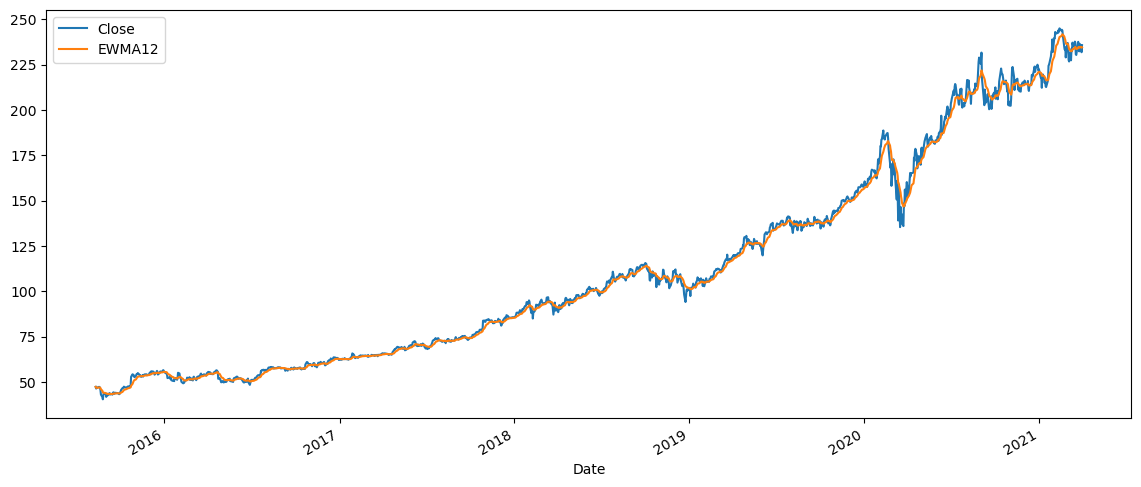

In [142]:
# Plotting the '#Passengers' column along with the 12-day Exponential Moving Average (EWMA)
# using the .plot() method. This visualization helps to compare the actual passenger numbers with the smoothed trend,
# where the EWMA line reflects the trend over the specified period, providing insight into the overall pattern of the data.
df[['Close', 'EWMA12']].plot(label='RELIANCE',
								figsize=(14, 6))


<Axes: xlabel='Date'>

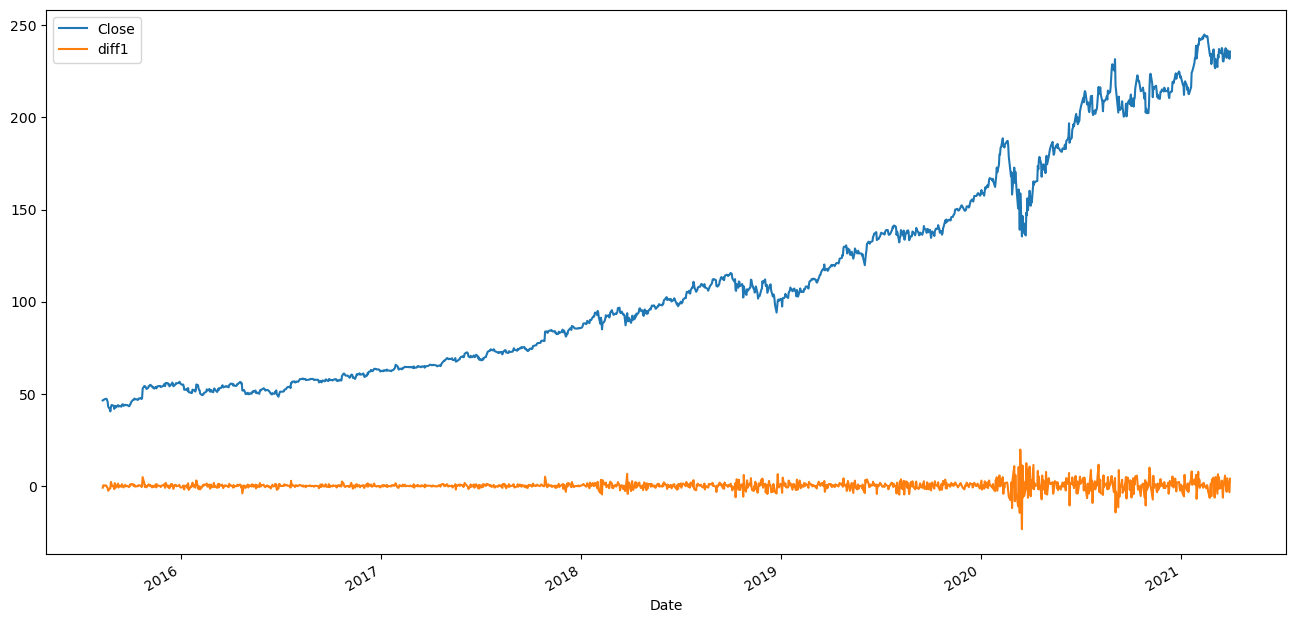

In [143]:
# diff1 
# Create a new column 'diff1' to store the first order differenced values
# This is done by subtracting the current value of '#Passengers' with the previous value (shifted by 1)
df['diff1'] = df['Close'] - df['Close'].shift(1)

# or using diff function 
df.dropna(inplace=True)
df[['Close', 'diff1']].plot(label='DF', 
                                  figsize=(16, 8))

In [144]:

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

y_train = train_data['Close']

y_test = test_data['Close']

ADF Statistic: 1.4701875788553027
p-value: 0.9974107912879806
ADF Statistic: -9.65895145208386
p-value: 1.3698945836848094e-16


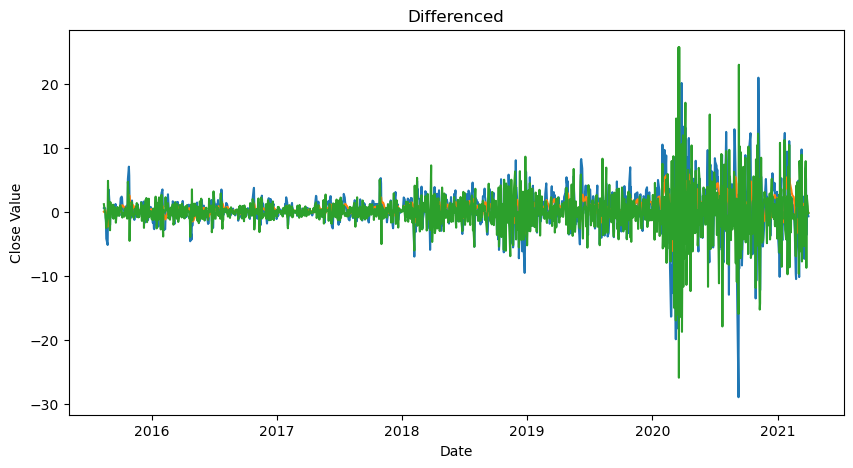

In [145]:
from statsmodels.tsa.stattools import adfuller

# Check for stationarity
result = adfuller(df['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Since the p-value is > 0.05, the data is not stationary. We need to difference it.
airline_data_diff = df.diff(3).dropna()

# Check for stationarity again
result = adfuller(airline_data_diff['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Plot the differenced data
plt.figure(figsize=(10, 5))
plt.plot(airline_data_diff)
plt.title('Differenced')
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.show()
